In [1]:
%load_ext autoreload

%autoreload 2

import sys

In [18]:
from case_generator import *

In [11]:
from tqdm import tqdm
def make_sample(number):
    peoples = []
    for _ in tqdm(range(number)):
        p = People()
        p.gen_all()
        peoples.append(p.to_series())
    return pd.DataFrame(peoples)

In [23]:
%%time
df = make_sample(100)

100%|██████████| 100/100 [00:00<00:00, 119.37it/s]

CPU times: user 882 ms, sys: 12.6 ms, total: 895 ms
Wall time: 854 ms


In [28]:
df

,age,sex,smoking,overweight,overall_risk,disease (target)
0,48.0,1.0,0.0,0.0,0.0630,0.0
1,67.0,1.0,0.0,0.0,0.1990,0.0
2,94.0,0.0,0.0,1.0,0.3760,0.0
3,66.0,0.0,0.0,1.0,0.1940,0.0
4,20.0,0.0,1.0,0.0,0.0078,0.0
...,...,...,...,...,...,...
95,42.0,0.0,0.0,1.0,0.1120,0.0
96,37.0,1.0,0.0,0.0,0.0060,0.0
97,45.0,0.0,0.0,0.0,0.0560,0.0
98,46.0,0.0,1.0,0.0,0.0728,0.0


In [29]:
p = People()
p.gen_all()
p.to_series()

age                 47.00000
sex                  1.00000
smoking              1.00000
overweight           0.00000
snp_0_f0             1.00000
                      ...   
snp_999_f0           0.00000
snp_999_f1           1.00000
snp_999_f2           0.00000
overall_risk         0.00083
disease (target)     0.00000
Length: 3006, dtype: float64

In [84]:
freq = 0.2
rv = stats.rv_discrete(name='allel',
                                    values=([0, 1, 2], [(1 - freq) ** 2, 2 * freq * (1 - freq), freq ** 2]))

In [91]:
%%time 
for _ in range(1000_00):
    rv = stats.rv_discrete(name='allel',
                                    values=([0, 1, 2], [(1 - freq) ** 2, 2 * freq * (1 - freq), freq ** 2]))
    rv.rvs()

CPU times: user 52.1 s, sys: 124 ms, total: 52.2 s
Wall time: 51.9 s


<AxesSubplot:xlabel='overall_risk', ylabel='Density'>

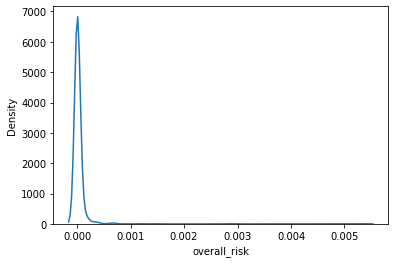

In [7]:
import seaborn as sns

sns.kdeplot(df['overall_risk'])